# EAD Model

In [39]:
import os
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.options.display.max_rows = None

In [3]:
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/dataset/"

# Use os.path.join to concatenate the folder and file paths
file_path = os.path.join(folder, 'loan_data_2007_2014_preprocessed.csv')

# Read the CSV file with the index_col parameter specified
loan_data_preprocessed_backup = pd.read_csv(file_path, index_col=0, low_memory=False)

## Explore Dataset

In [4]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

In [5]:
loan_data_preprocessed.columns.values
# Displays all column names.

array(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
   

In [6]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]
# Here we take only the accounts that were charged-off (written-off).

In [7]:
loan_data_defaults.tail().T

id,9856168,9835883,9695736,9007579,9684700
member_id,11708132,9309502,11547808,10799568,11536848
loan_amnt,6000,15000,8525,18000,22000
funded_amnt,6000,15000,8525,18000,22000
funded_amnt_inv,6000.0,15000.0,8525.0,17975.0,22000.0
term,60 months,36 months,60 months,36 months,60 months
int_rate,23.4,16.99,18.25,7.9,19.97
installment,170.53,534.72,217.65,563.23,582.5
grade,E,D,D,A,D
sub_grade,E5,D1,D3,A4,D5
emp_title,NaN,NaN,MANAGER,sales rep,Chief of Interpretation (Park Ranger)


In [8]:
loan_data_preprocessed.shape

(466285, 205)

In [9]:
loan_data_defaults.shape

(43236, 205)

In [10]:
loan_data_defaults.isnull().sum()

member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                                         0
annual_inc                                                             0
verification_status                                

## Independent Variable

In [11]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_19668\1952283613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_19668\1952283613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)


## Dependent Variable

In [12]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

C:\Users\Hrushikesh.Hrushikesh-Asus\AppData\Local\Temp\ipykernel_19668\1145321474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [13]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

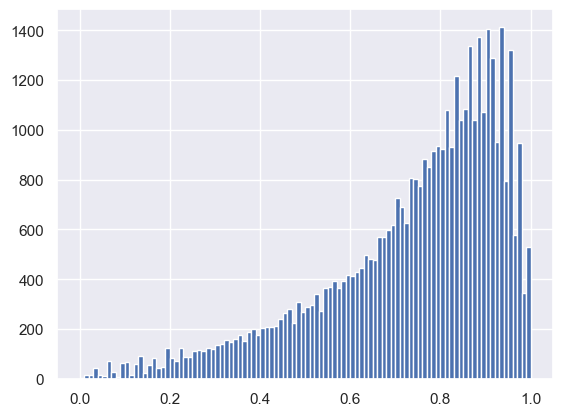

In [14]:
plt.hist(loan_data_defaults['CCF'], bins = 100);

## Splitting the data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# LGD model stage 1 datasets: recovery rate 0 or greater than 0.
X = loan_data_defaults.drop(['CCF'], axis = 1)
y = loan_data_defaults[['CCF']]
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(X, y,
                                                                                          test_size = 0.2, random_state = 42)

In [17]:
ead_inputs_train.shape, ead_inputs_test.shape

((34588, 205), (8648, 205))

## Preparing the inputs

In [18]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [19]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [20]:
ead_inputs_train = ead_inputs_train[features_all]

In [21]:
ead_inputs_train.shape

(34588, 49)

In [22]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [23]:
ead_inputs_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

## Modelling

In [24]:
import statsmodels.api as sm

class LinearRegressionWithPValues:
    def __init__(self):
        self.model = None
        self.p_values = None

    def fit(self, X, y):
        X = sm.add_constant(X)  # Add a constant term for the intercept
        self.model = sm.OLS(y, X).fit()

        # Calculate p-values for coefficients
        self.p_values = self.model.pvalues[1:]  # Exclude the intercept term

    def predict(self, X):
        X = sm.add_constant(X)
        return self.model.predict(X)

In [25]:
def create_summary_table_linear(reg, inputs_train):
    # Get the coefficients and feature names
    coefficients = reg.model.params
    feature_names = ['Intercept'] + list(inputs_train.columns)

    # Get p-values
    p_values = reg.p_values
    p_values = [np.nan] + list(p_values)

    # Create a DataFrame for coefficients and p-values
    summary_table = pd.DataFrame({'Feature name': feature_names, 'Coefficients': coefficients, 'p_values': p_values}).reset_index(drop=True)

    return summary_table

In [26]:
reg_ead = LinearRegressionWithPValues()
reg_ead.fit(ead_inputs_train, ead_targets_train.values)

In [27]:
summary_table = create_summary_table_linear(reg_ead, ead_inputs_train)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.111570e+00,NaN
1,grade:A,-3.039918e-01,1.204772e-103
2,grade:B,-2.371857e-01,2.849679e-95
3,grade:C,-1.726286e-01,7.714790e-69
4,grade:D,-1.202789e-01,3.325967e-44
5,grade:E,-6.795465e-02,4.243490e-18
6,grade:F,-2.055644e-02,8.273101e-03
7,home_ownership:MORTGAGE,-6.347775e-03,2.614104e-03
8,home_ownership:NONE,-6.635160e-03,9.184577e-01
9,home_ownership:OTHER,-2.583992e-03,9.292689e-01


## Testing

In [28]:
ead_inputs_test = ead_inputs_test[features_all]
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [29]:
ead_inputs_test.shape, ead_targets_test.shape

((8648, 44), (8648, 1))

In [30]:
# ead_targets_test

In [31]:
# Make predictions
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [32]:
y_hat_test_ead.head()

id
2382805     0.681016
8597067     0.658750
6715387     0.867836
10111118    0.664361
34423403    0.802035
dtype: float64

In [33]:
ead_targets_test.head()

,CCF
id,
2382805,0.512662
8597067,0.692654
6715387,0.789353
10111118,0.638038
34423403,0.817017


In [34]:
# Reset the index of lgd_targets_stage_2_test
ead_targets_test = ead_targets_test.reset_index(drop=True).values.ravel()

# Create a DataFrame with both actual and predicted values
results_df = pd.DataFrame({'Actual': ead_targets_test, 'Predicted': y_hat_test_ead})
results_df

,Actual,Predicted
id,,
2382805,0.512662,0.681016
8597067,0.692654,0.658750
6715387,0.789353,0.867836
10111118,0.638038,0.664361
34423403,0.817017,0.802035
15459565,0.910006,0.886812
24816397,0.875440,0.892738
17994053,0.952632,0.740812
6717906,0.697558,0.707935


## Estimating the residuals

In [35]:
# Calculate the correlation between actual and predicted values
correlation = results_df.corr()
print(correlation)

             Actual  Predicted
Actual     1.000000   0.530541
Predicted  0.530541   1.000000


C:\Users\Hrushikesh.Hrushikesh-Asus\anaconda3\envs\udemy\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hrushikesh.Hrushikesh-Asus\anaconda3\envs\udemy\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


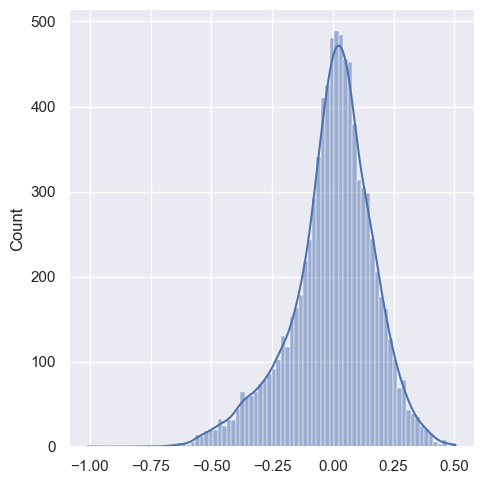

In [37]:
# Visualize the distribution of residuals (the difference between actual and predicted values)
residuals = ead_targets_test - y_hat_test_ead
sns.displot(residuals, kde = True);

### Saving the model

In [40]:
# Define the folder path
folder = "C:/Users/Hrushikesh.Hrushikesh-Asus/Desktop/Courses/Udemy/Credit Risk Modeling in Python/mywork/model/"

# Pickle and save the model
print(f"Saving the model ...")
with open(os.path.join(folder, 'ead_model.sav'), 'wb') as file:
    pickle.dump(reg_ead, file)
print(f"Sucessfully saved the model!!!")

Saving the model ...
Sucessfully saved the model!!!
